<h1 align="center"> SMS SPAM DETECTION CLASSIFIER</h1>

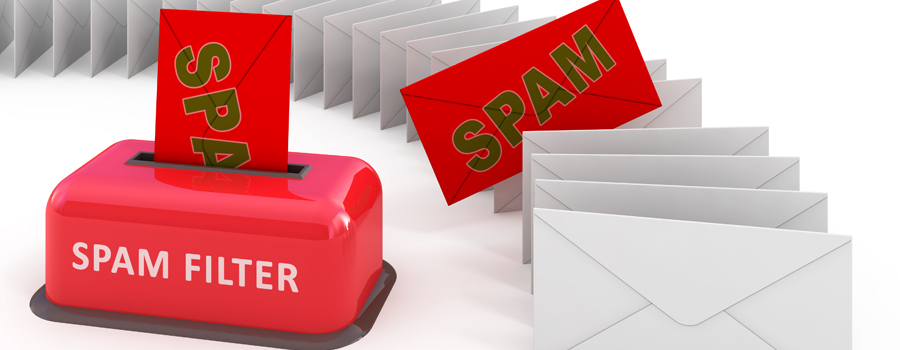

In this project, I am going to detect whether the text message is Spam or Ham.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## **Important Libraries**

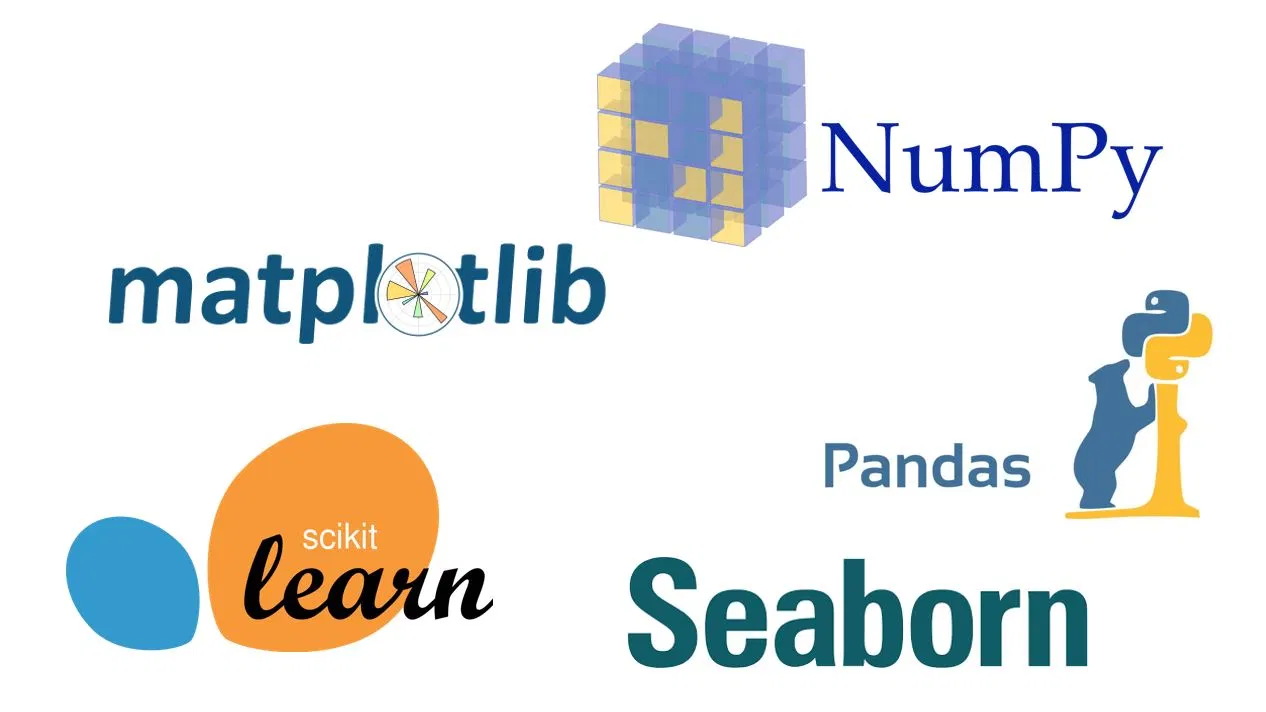

For data manipulation and creating arrays:

    Pandas Library
    Numpy Library

For converting words into vectors:

    sklearn.feature_extraction.text import CountVectorizer
    sklearn.feature_extraction.text import TfidfVectorizer

For model building:

    sklearn.ensemble import RandomForestClassifier
    sklearn.naive_bayes import MultinomialNB
    sklearn.naive_bayes import GaussianNB


For model evaluation:

    sklearn.metrics import classification_report,confusion_matrix,accuracy_score


**About Dataset**

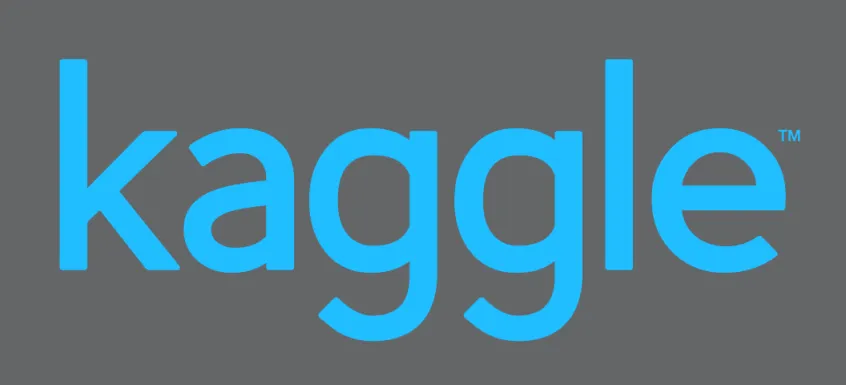
1. This dataset is taken from kaggle platform.

2. The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. 
3. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.
4. The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

5. This corpus has been collected from free or free for research sources at the Internet


In [ ]:
#Reading a data using python's pandas library
import pandas as pd
data=pd.read_csv('/gdrive/My Drive/SMS spam detection/spam.csv',encoding="ISO-8859-1")



In [ ]:
#Printing the columns
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
#Printing the data
data[['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
#dropping unnecessary columns
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True,axis=1)

In [ ]:
#data after dropping the unnecessary columns
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Changing the column name for the easy convenience
data.columns=['Result','SMS']

In [ ]:
data.head()

,Result,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#To get the count no.of spam and ham messages in the data
data["Result"].value_counts()

ham     4825
spam     747
Name: Result, dtype: int64

<BarContainer object of 2 artists>

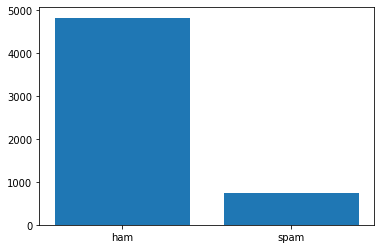

In [ ]:
#visualizing the data for better understanding
import matplotlib.pyplot as plt
val_counts=data["Result"].value_counts()
plt.bar(['ham','spam'],val_counts,data=data['Result'])

From the above grph, it is clear that ham message data is higher than spam  message data.

<br>

### Since Result values are categorical values so we convert it into numerical values using replace method.

In [ ]:
#convert spam to 1 and ham to 0
data['Result'].replace('spam',1,inplace=True)
data['Result'].replace('ham',0,inplace=True)


In [ ]:
data.head(10)

,Result,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


**Text Pre-Processing**
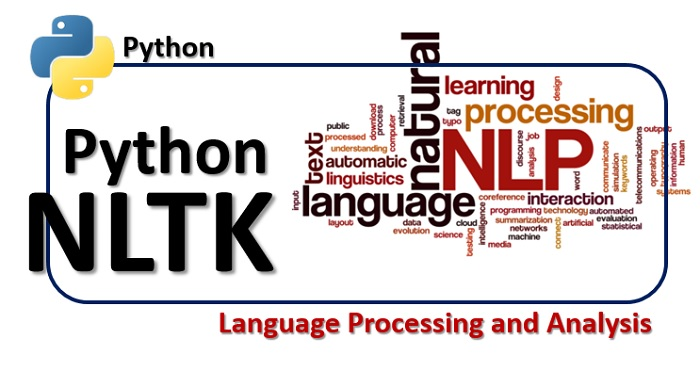
1. Removing punctuation marks.
2. Removing stopwords 
3. Converting the words into vectors using Bag of words and TF-IDF methods.
4. Word tokenization
5. Lemmatization 

In [ ]:
#Storing each messages in a sentence list
sentences=[]
for i in range(0,len(data['SMS'])):
  sentences.append(data['SMS'][i])

In [ ]:
print(sentences[0:9])

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.']

In [ ]:
#importing necessary libraries for text pre-processing
import re
import re
import nltk
nltk.download('punkt')
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:

lemmatizer=WordNetLemmatizer()
for i in range(0,len(sentences)):
  sms=re.sub('[^a-zA-Z]',' ',sentences[i]) #removing punctuation marks using regex
  sms=sms.lower() #lowering the sentences
  sms=sms.split() #word tokenization
  sms= [lemmatizer.lemmatize(word) for word in sms if word not in set(stopwords.words('english'))] #lemmatization and removing stopwords
  sentences[i]=' '.join(sms)

In [ ]:
#data after pre-processing
processed_data=pd.DataFrame(sentences)
processed_data.columns=['SMS']
processed_data.head(20)

,SMS
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry wkly comp win fa cup final tkts st ...
3,u dun say early hor u c already say
4,nah think go usf life around though
5,freemsg hey darling week word back like fun st...
6,even brother like speak treat like aid patent
7,per request melle melle oru minnaminunginte nu...
8,winner valued network customer selected receiv...
9,mobile month u r entitled update latest colour...


## Saving the pre-processed data for future use or model development.

In [ ]:
#saving the pre processed data for future reference
complete_processed_data=pd.concat([processed_data,data['Result']],axis=1)
complete_processed_data.head(10)

,SMS,Result
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,u dun say early hor u c already say,0
4,nah think go usf life around though,0
5,freemsg hey darling week word back like fun st...,1
6,even brother like speak treat like aid patent,0
7,per request melle melle oru minnaminunginte nu...,0
8,winner valued network customer selected receiv...,1
9,mobile month u r entitled update latest colour...,1


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
#saving the dataframe to csv file
complete_processed_data.to_csv('/gdrive/My Drive/SMS spam detection/Complete_processed_spam_data.csv')

Click the below link to get into Model development page.
[Model Development page](https://colab.research.google.com/drive/170ivDadKbRgMTRjFW6kfcoI7dbRKf25V?usp=sharing)
